#Essential Library

In [26]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from keras import optimizer_v2

#Regression

In [27]:
url='https://raw.githubusercontent.com/ShantanuVidwans/sequential_regression_model/master/data.csv'
df=pd.read_csv(url)
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [28]:
#change dataframe to numpy array
x=df.iloc[:,0:1].values
y=df.iloc[:,1:2].values

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.15, random_state=1)
x_train.shape

(255, 1)

In [29]:
model= Sequential()
model.add(Dense(200,input_dim=1,activation='relu'))
model.add(Dense(200,input_dim=200,activation='relu'))
model.add(Dense(200,input_dim=200,activation='relu'))
model.add(Dense(1,input_dim=200,activation='linear'))

In [30]:
opt=keras.optimizer_v2.adam.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer= opt, metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               400       
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81,001
Trainable params: 81,001
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
training=model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.15, validation_data=None, verbose=1)

Epoch 1/50
7/7 [==============================] - 1s 56ms/step - loss: 1828.4962 - mse: 1828.4962 - val_loss: 388.7861 - val_mse: 388.7861
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 128.9636 - mse: 128.9636 - val_loss: 398.7306 - val_mse: 398.7306
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 181.0446 - mse: 181.0446 - val_loss: 12.3176 - val_mse: 12.3176
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 45.8542 - mse: 45.8542 - val_loss: 70.1165 - val_mse: 70.1165
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 33.8472 - mse: 33.8472 - val_loss: 12.0064 - val_mse: 12.0064
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 16.0378 - mse: 16.0378 - val_loss: 15.8922 - val_mse: 15.8922
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 12.7613 - mse: 12.7613 - val_loss: 9.7700 - val_mse: 9.7700
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - l

In [32]:
keras.backend.clear_session()

In [33]:
pred=model.predict(x_test)
pred

array([[ 46.38145   ],
       [ 11.972009  ],
       [  3.8604093 ],
       [ 44.357372  ],
       [ -0.36768782],
       [ 20.068354  ],
       [ 58.52597   ],
       [ 53.46575   ],
       [  5.8955946 ],
       [ 54.477795  ],
       [ 76.74272   ],
       [ 60.550045  ],
       [ 47.393497  ],
       [ 69.65843   ],
       [ 99.00766   ],
       [ 52.453705  ],
       [ 19.056307  ],
       [ 66.6223    ],
       [  6.9103584 ],
       [ 27.15265   ],
       [ 21.080397  ],
       [ 41.321243  ],
       [ 95.97153   ],
       [ 96.98358   ],
       [ 11.972009  ],
       [ 87.8752    ],
       [ 55.489838  ],
       [ 67.63434   ],
       [ -0.36768782],
       [ 37.27307   ],
       [ 53.46575   ],
       [ 90.91132   ],
       [ 13.996096  ],
       [ 57.51392   ],
       [ 88.88722   ],
       [ 59.538013  ],
       [ 13.996096  ],
       [ 49.417587  ],
       [ 68.646385  ],
       [ 95.97153   ],
       [101.03174   ],
       [ 13.996096  ],
       [ 73.70659   ],
       [ 36

In [34]:
pred.shape

(45, 1)

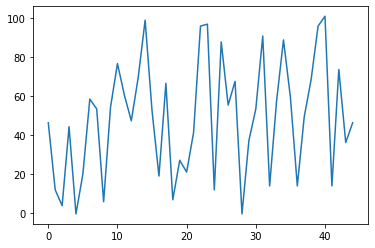

In [35]:
import matplotlib.pyplot as plt
plt.plot(pred)